# 🧠 AI vs Human Text Detection using XLM-RoBERTa

### This project builds a deep learning classifier to distinguish between human-written and AI-generated text.

> Dataset: AI vs Human Content Detection

> Model: XLM-RoBERTa Base

> Framework: PyTorch + Hugging Face Transformers

> Task: Binary Classification (Human vs AI)

> Final Validation Accuracy: ~99%

# 📚 Importing Required Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import kagglehub

# 📥 Downloading Dataset

In [2]:
path = kagglehub.dataset_download("mafaqbhatti/ai-vs-human-content-detection-dataset-2026")
print("Path to dataset files:", path)

print("\nFiles in dataset directory:")
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

Path to dataset files: /kaggle/input/datasets/mafaqbhatti/ai-vs-human-content-detection-dataset-2026

Files in dataset directory:
/kaggle/input/datasets/mafaqbhatti/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv


# 🔎 Exploring the Dataset

In [3]:
csv_path = "/kaggle/input/datasets/mafaqbhatti/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv"

df = pd.read_csv(csv_path)

print("Shape of dataset:", df.shape)
print("\nColumns")
print(df.columns)

print("\nFrist 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

Shape of dataset: (686, 11)

Columns
Index(['id', 'text', 'human_or_ai', 'source_model', 'prompt', 'domain',
       'language', 'edit_level', 'word_count', 'generation_date', 'version'],
      dtype='object')

Frist 5 rows:


,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
0,e37e31c0-35d0-486d-9760-efadd4e0e289,Aprender programación en Python es fácil . Pri...,human,Human,NaN,Technical Blog,es,none,34,2026-01-29T08:38:18.272755,v1.0
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnología en el aprend...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
3,6177fc40-1567-445b-af15-f3250ddd3403,**Global Economic Trends: A Shifting Landscape...,ai,llama-3.1-8b-instant,Write about economic trends affecting global m...,News,en,none,558,2026-01-29T08:39:55.917663,v1.0
4,192a9615-ed51-4750-b649-d18f8882f555,"""Recuerda que tú eres fuerte, capaz y única. N...",ai,llama-3.1-8b-instant,Escribe una publicación inspiradora para redes...,Social Media,es,none,147,2026-01-29T08:42:52.451370,v1.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               686 non-null    object
 1   text             686 non-null    object
 2   human_or_ai      686 non-null    object
 3   source_model     686 non-null    object
 4   prompt           505 non-null    object
 5   domain           686 non-null    object
 6   language         686 non-null    object
 7   edit_level       686 non-null    object
 8   word_count       686 non-null    int64 
 9   generation_date  686 non-null    object
 10  version          686 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.1+ KB
None

Missing values per column:
id                   0
text                 0
human_or_ai          0
source_model         0
prompt             181
domain               0
language             0
edit_level           0
word_count           0
gen

# 📊 Exploratory Data Analysis (EDA)

*** Target Distribution ***
human_or_ai
ai                335
human             181
post_edited_ai    170
Name: count, dtype: int64

Percentage:
human_or_ai
ai                48.833819
human             26.384840
post_edited_ai    24.781341
Name: proportion, dtype: float64

*** Edit Level Distribution ***
edit_level
none     516
light     89
heavy     81
Name: count, dtype: int64

*** Language Distribution ***
language
en            246
hi             99
ur             93
ar             79
es             70
fr             52
code-mixed     47
Name: count, dtype: int64

*** Domain Distribution ***
domain
Social Media      121
Marketing         121
Technical Blog    118
Email             117
News              106
Education         103
Name: count, dtype: int64

*** Source Model Distribution ***
source_model
llama-3.1-8b-instant                   499
Human                                  181
gemma2-9b-it                             3
gemma2-9b-itllama-3.3-70b-versatile      3
Name: count

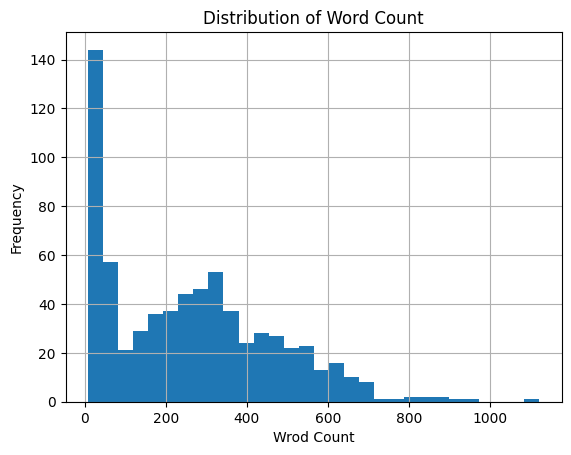

In [4]:
print("*** Target Distribution ***")
print(df["human_or_ai"].value_counts())
print("\nPercentage:")
print(df["human_or_ai"].value_counts(normalize=True) * 100)

print("\n*** Edit Level Distribution ***")
print(df["edit_level"].value_counts())

print("\n*** Language Distribution ***")
print(df["language"].value_counts())

print("\n*** Domain Distribution ***")
print(df["domain"].value_counts())

print("\n*** Source Model Distribution ***")
print(df["source_model"].value_counts())

print("\n*** Word Count Statistics ***")
print(df["word_count"].describe())

plt.figure()
df["word_count"].hist(bins=30)
plt.xlabel("Wrod Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count")
plt.show()

# ⚠️ Identifying Error Samples

In [5]:
error_samples = df[df["text"].str.startswith("Error", na=False)]

print("Number of error samples:", len(error_samples))
print("\nDistribution of labels in error samples:")
print(error_samples["human_or_ai"].value_counts())

print("\nSample error rows:")
display(error_samples.head())

Number of error samples: 6

Distribution of labels in error samples:
human_or_ai
post_edited_ai    4
ai                2
Name: count, dtype: int64

Sample error rows:


,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnología en el aprend...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
20,2bc6fd58-df92-4bfc-8b9f-3308abe95fe8,Error: 400 Client Error: Bad Request for url: ...,post_edited_ai,gemma2-9b-it,تقرير عن الابتكارات العلمية,News,ar,light,9,2026-01-29T09:41:22.573395,v1.0
21,2e3110ba-c8e3-438c-916f-a89464b13a24,Error: 404 Client Error: Not Found for url: ht...,post_edited_ai,gemma2-9b-itllama-3.3-70b-versatile,Artículo profesional de LinkedIn,Social Media,es,light,9,2026-01-29T09:49:50.085462,v1.0
24,93c2888d-e255-43d3-a9df-a1ea2f7f5d78,Error: 400 Client Error: Bad Request for url: ...,post_edited_ai,gemma2-9b-it,प्रेरणादायक सोशल मीडिया पोस्ट लिखें,Social Media,hi,heavy,14,2026-01-29T09:40:41.974928,v1.0


# 🧹 Cleaning the Dataset

In [6]:
df_clean = df[~df["text"].str.startswith("Error", na=False)].copy()

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

print("\nNew target distribution:")
print(df_clean["human_or_ai"].value_counts())

Original shape: (686, 11)
Cleaned shape: (680, 11)

New target distribution:
human_or_ai
ai                333
human             181
post_edited_ai    166
Name: count, dtype: int64


# 🔄 Merging AI and Post-Edited AI Classes

In [7]:
df_clean['human_or_ai'] = df_clean['human_or_ai'].replace({'post_edited_ai': 'ai'})

print("New target distribution after merging classes:")
print(df_clean['human_or_ai'].value_counts())

New target distribution after merging classes:
human_or_ai
ai       499
human    181
Name: count, dtype: int64


# 🏷️ Encoding Target Labels

In [8]:
label_mapping = {
    "human": 0,
    "ai": 1,
}

df_clean["label"] = df_clean["human_or_ai"].map(label_mapping)

print("Unique lebels:", df_clean["label"].unique())
print("Label Distribution:", df_clean["label"].value_counts())

Unique lebels: [0 1]
Label Distribution: label
1    499
0    181
Name: count, dtype: int64


# ✂️ Splitting Data into Train and Validation Sets

In [9]:
texts = df_clean["text"].values
labels = df_clean["label"].values

X_train, X_val, y_train, y_val = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))

print("\nTrain class distribution:")
print(np.bincount(y_train))

print("\nValidation class distribution:")
print(np.bincount(y_val))

Train size: 544
Validation size: 136

Train class distribution:
[145 399]

Validation class distribution:
[ 36 100]


# 🖥️ Checking GPU Availability

In [10]:
print("PyTorch version", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

PyTorch version 2.9.0+cu126
CUDA available: True
Using device cuda


# 🔤 Text Tokenization using XLM-RoBERTa

In [11]:
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

sample_text = X_train[0]

encoded = tokenizer(
    sample_text,
    padding="max_length",
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

print("Original text:\n", sample_text)
print("\nToken IDs:\n", encoded["input_ids"])
print("\nAttention mask:\n", encoded["attention_mask"])
print("\nNumber of tokens:", encoded["input_ids"].shape[1])

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Original text:
 **Global Economic Trends Affecting Markets**

The global economy is experiencing a complex and dynamic landscape, driven by various trends that are shaping the markets. In this report, we will examine some of the key economic trends affecting global markets, including:

1. **Rise of Emerging Markets**: Emerging economies, such as China, India, and Brazil, are increasingly contributing to global GDP and investment flows. As these countries continue to grow, they are becoming more integrated into the global economy, creating new opportunities and risks for investors.

2. **Trade Tensions and Protectionism**: The ongoing trade tensions between the United States, China, and other countries have led to a rise in protectionism, with governments imposing tariffs and other trade restrictions. This has created uncertainty and volatility in global markets, particularly in the manufacturing and agriculture sectors.

3. **Shift to Digital Economy**: The COVID-19 pandemic has accele

# 🧩 Creating a Custom PyTorch Dataset

In [12]:
class AIHumanDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length


    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        input_ids = encoding["input_ids"].squeeze(0)
        attention_mask = encoding["attention_mask"].squeeze(0)
    
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": torch.tensor(label, dtype=torch.long)
        }


train_dataset = AIHumanDataset(X_train, y_train, tokenizer, max_length=128)
val_dataset = AIHumanDataset(X_val, y_val, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

batch = next(iter(train_loader))
print("Batch input_ids shape:", batch["input_ids"].shape)
print("Batch attention_mask:", batch["attention_mask"].shape)
print("Batch labels shape:", batch["labels"].shape)

Batch input_ids shape: torch.Size([16, 128])
Batch attention_mask: torch.Size([16, 128])
Batch labels shape: torch.Size([16])


# 🤖 Loading Pretrained XLM-RoBERTa Model

In [13]:
model = AutoModelForSequenceClassification.from_pretrained(
    "xlm-roberta-base",
    num_labels=2
)


model.to(device)


batch = next(iter(train_loader))
input_ids = batch["input_ids"].to(device)
attention_mask = batch["attention_mask"].to(device)
labels = batch["labels"].to(device)


outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
loss = outputs.loss
logits = outputs.logits

print("Test forward pass successful!")
print("Loss:", loss.item())
print("Logits shape:", logits.shape)


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

XLMRobertaForSequenceClassification LOAD REPORT from: xlm-roberta-base
Key                         | Status     | 
----------------------------+------------+-
roberta.pooler.dense.weight | UNEXPECTED | 
lm_head.bias                | UNEXPECTED | 
lm_head.layer_norm.bias     | UNEXPECTED | 
lm_head.layer_norm.weight   | UNEXPECTED | 
lm_head.dense.bias          | UNEXPECTED | 
lm_head.dense.weight        | UNEXPECTED | 
roberta.pooler.dense.bias   | UNEXPECTED | 
classifier.dense.weight     | MISSING    | 
classifier.out_proj.weight  | MISSING    | 
classifier.out_proj.bias    | MISSING    | 
classifier.dense.bias       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Test forward pass successful!
Loss: 0.8073520660400391
Logits shape: torch.Size([16, 2])


# 🚀 Model Training with Early Stopping

In [14]:
for param in model.parameters():
    param.requires_grad = True

print("Total trainable parameters:",
      sum(p.numel() for p in model.parameters() if p.requires_grad))

criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=2e-5
)

epochs = 30
patience = 6
best_val_loss = float('inf')
no_improve_counter = 0
save_path = "best_model.pt"

for epoch in range(epochs):
    print(f"\n===== Epoch {epoch+1}/{epochs} =====")

    model.train()
    total_loss = 0


    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        loss = criterion(outputs.logits, labels)
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_loader)
    print("Average training loss:", avg_train_loss)

    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            loss = criterion(outputs.logits, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Validation loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        no_improve_counter = 0
        torch.save(model.state_dict(), save_path)
        print("Best model saved!")
    else:
        no_improve_counter += 1
        print(f"No improvement for {no_improve_counter} epoch(s)")

    if no_improve_counter >= patience:
        print("Early stopping triggered!")
        break

print("\nTraining finished. Best model saved to", save_path)

Total trainable parameters: 278045186

===== Epoch 1/30 =====


100%|██████████| 34/34 [00:13<00:00,  2.49it/s]


Average training loss: 0.4553603157401085
Validation loss: 0.2436, Accuracy: 0.9706
Best model saved!

===== Epoch 2/30 =====


100%|██████████| 34/34 [00:13<00:00,  2.51it/s]


Average training loss: 0.17173916660249233
Validation loss: 0.0750, Accuracy: 0.9853
Best model saved!

===== Epoch 3/30 =====


100%|██████████| 34/34 [00:13<00:00,  2.46it/s]


Average training loss: 0.025690004911773617
Validation loss: 0.1097, Accuracy: 0.9853
No improvement for 1 epoch(s)

===== Epoch 4/30 =====


100%|██████████| 34/34 [00:14<00:00,  2.41it/s]


Average training loss: 0.013915807965317713
Validation loss: 0.0599, Accuracy: 0.9926
Best model saved!

===== Epoch 5/30 =====


100%|██████████| 34/34 [00:14<00:00,  2.36it/s]


Average training loss: 0.0022602130236063045
Validation loss: 0.0630, Accuracy: 0.9926
No improvement for 1 epoch(s)

===== Epoch 6/30 =====


100%|██████████| 34/34 [00:14<00:00,  2.30it/s]


Average training loss: 0.00021138008421129438
Validation loss: 0.0646, Accuracy: 0.9926
No improvement for 2 epoch(s)

===== Epoch 7/30 =====


100%|██████████| 34/34 [00:15<00:00,  2.21it/s]


Average training loss: 0.0001492053503598607
Validation loss: 0.0648, Accuracy: 0.9926
No improvement for 3 epoch(s)

===== Epoch 8/30 =====


100%|██████████| 34/34 [00:15<00:00,  2.17it/s]


Average training loss: 0.00011318968715974788
Validation loss: 0.0672, Accuracy: 0.9926
No improvement for 4 epoch(s)

===== Epoch 9/30 =====


100%|██████████| 34/34 [00:15<00:00,  2.23it/s]


Average training loss: 0.0001032247166543076
Validation loss: 0.0683, Accuracy: 0.9926
No improvement for 5 epoch(s)

===== Epoch 10/30 =====


100%|██████████| 34/34 [00:14<00:00,  2.27it/s]


Average training loss: 8.17811497279977e-05
Validation loss: 0.0683, Accuracy: 0.9926
No improvement for 6 epoch(s)
Early stopping triggered!

Training finished. Best model saved to best_model.pt


# 📈 Final Evaluation on Validation Set

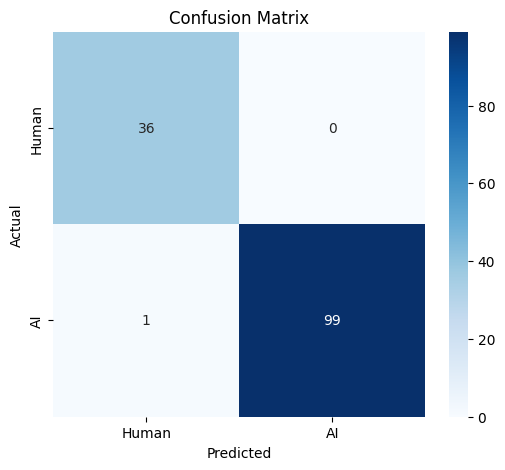


Classification Report:

              precision    recall  f1-score   support

       Human       0.97      1.00      0.99        36
          AI       1.00      0.99      0.99       100

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



In [15]:
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Human", "AI"],
            yticklabels=["Human", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(all_labels, all_preds,
                               target_names=["Human", "AI"])
print("\nClassification Report:\n")
print(report)
